In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import pandas as pd
import scipy.stats as ss

In [10]:
grasp = pd.read_csv("./notebooks/logfile", sep='\t', names=['0', '1', 'score', 'iters', 'time'])
tsili = pd.read_csv("./notebooks/res", sep=' ', names=['iters', 'score', 'time'])
gen = pd.read_csv("./notebooks/points_results.dat", sep=' ', names=['time', 'score'])
dfs = [grasp, tsili, gen]
colors = ['blue', 'red', 'green']
names = ['grils', 'tsili', 'evol']

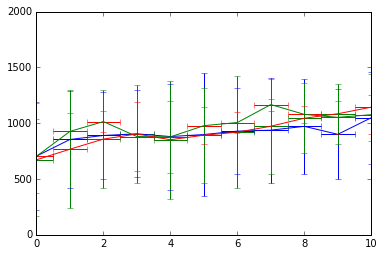

In [16]:
for i, df in enumerate(dfs):
	axes = plt.gca()
	axes.set_xlim([0,10])
	axes.set_ylim([0,2000])
	df['time_bins'], bins = pd.cut(df['time'], 100, retbins=True)
	m = df.groupby('time_bins')['score'].mean()
	std = df.groupby('time_bins')['score'].std()
	std = std.fillna(method='pad')
	plt.errorbar(range(len(m)), m, xerr=0.5, yerr=2*std, ecolor=colors[i])
	plt.show()

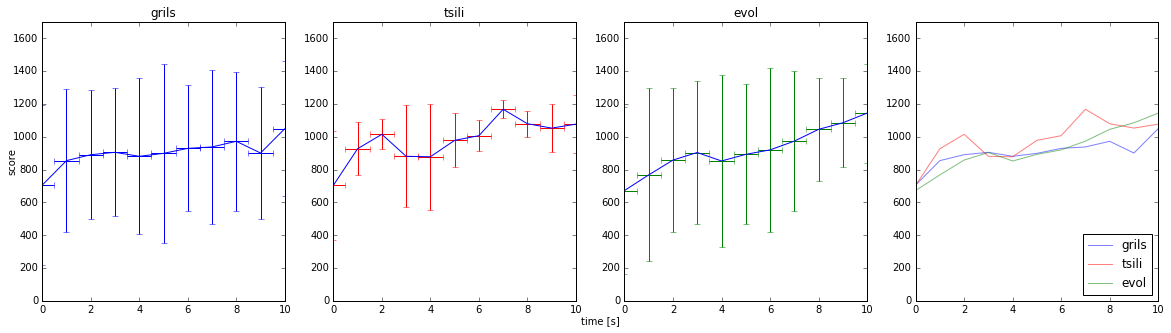

In [25]:
fig = plt.figure(figsize=(20,5))
# axes = plt.gca()
# fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True, sharey=True)
ax = fig.add_subplot(111)
ax.set_xlabel('time [s]')
ax.set_ylabel('score')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.tick_params(axis='x', pad=10)
ax.tick_params(axis='y', pad=20)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
# ax.axis('off')


for i, df in enumerate(dfs):
	axes = fig.add_subplot(1,4,i+1)
	axes.set_xlim([0,10])
	axes.set_ylim([0,1700])
	# axes.set_xlable('iters')
	# axes.set_ylable('score')
	axes.set_title(r'{}'.format(names[i]))
	df['time_bins'], bins = pd.cut(df['time'], 100, retbins=True)
	m = df.groupby('time_bins')['score'].mean()
	std = df.groupby('time_bins')['score'].std()
	std = std.fillna(method='pad')
	axes.errorbar(range(len(m)), m, xerr=0.5, yerr=2*std, ecolor=colors[i])

axes = fig.add_subplot(1,4,4)
axes.set_xlim([0,10])
axes.set_ylim([0,1700])
# axes.set_xlable('iters')
# axes.set_ylable('score')
for i, df in enumerate(dfs):
	m = df.groupby('time_bins')['score'].mean()
	axes.plot(range(len(m)), m, "-", color=colors[i], alpha=0.5, label=names[i])
	# axes.errorbar(m.index, m, xerr=0.5, yerr=0, linestyle='', ecolor=colors[i])
	axes.legend(loc="lower right", numpoints=1)

plt.show()
fig.savefig('comparison.png')

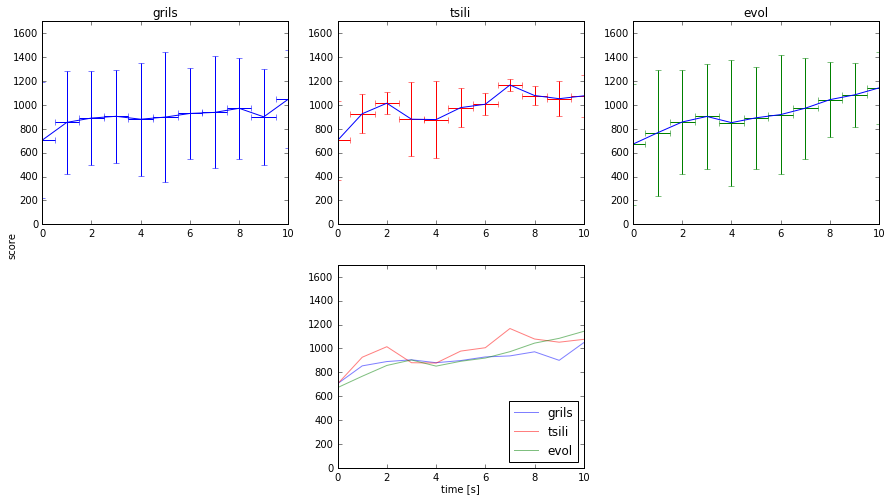

In [31]:
fig = plt.figure(figsize=(15,8))
# axes = plt.gca()
# fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True, sharey=True)
ax = fig.add_subplot(111)
ax.set_xlabel('time [s]')
ax.set_ylabel('score')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.tick_params(axis='x', pad=10)
ax.tick_params(axis='y', pad=20)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
# ax.axis('off')


for i, df in enumerate(dfs):
	axes = fig.add_subplot(2,3,i+1)
	axes.set_xlim([0,10])
	axes.set_ylim([0,1700])
	# axes.set_xlable('iters')
	# axes.set_ylable('score')
	axes.set_title(r'{}'.format(names[i]))
	df['time_bins'], bins = pd.cut(df['time'], 100, retbins=True)
	m = df.groupby('time_bins')['score'].mean()
	std = df.groupby('time_bins')['score'].std()
	std = std.fillna(method='pad')
	axes.errorbar(range(len(m)), m, xerr=0.5, yerr=2*std, ecolor=colors[i])

axes = fig.add_subplot(2,3,5)
axes.set_xlim([0,10])
axes.set_ylim([0,1700])
# axes.set_xlable('iters')
# axes.set_ylable('score')
for i, df in enumerate(dfs):
	m = df.groupby('time_bins')['score'].mean()
	axes.plot(range(len(m)), m, "-", color=colors[i], alpha=0.5, label=names[i])
	# axes.errorbar(m.index, m, xerr=0.5, yerr=0, linestyle='', ecolor=colors[i])
	axes.legend(loc="lower right", numpoints=1)

plt.show()
fig.savefig('comparison_f.png')